# Testing Pandas 2.0.1
#### NOTE: Pandas has been updated from 2.0.0rc1 to 2.0.1
### Examining the difference in performance in Pandas when using PyArrow backend vs Numpy backend and PyArrow backend vs Polars

## Loading required packages and testing versions

In [1]:
import numpy as np
import pandas
import pandas as pd
import polars as pl
import pyarrow

print(f"numpy {np.__version__}")
print(f"pandas {pd.__version__}")
print(f"polars {pl.__version__}")

numpy 1.24.3
pandas 2.0.1
polars 0.17.13


### Set global options for Pandas

In [2]:
pd.options.display.max_rows = 5

### Set global alias for timeit features
This feature will be use to see packages options compare 

In [3]:
%alias_magic t timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


## Reading data with Pandas - Numpy backend

### Loading University Students Complaints & Reports Dataset from Kaggle
https://www.kaggle.com/datasets/omarsobhy14/university-students-complaints-and-reports
#### NOTE: The dataset has been edited for test by remove select integer datapoints 



In [42]:
df_np = pd.read_csv("data/student_reports.csv")

#### Operation time for loading data with Numpy backend

In [44]:
%%t -n1
pd.read_csv("data/student_reports.csv")

6.05 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Sample of view of the data

In [35]:
df_np

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27.0,2.18,2.0,1,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23.0,3.11,2.0,1,F
...,...,...,...,...,...,...,...
1003,Food and Cantines,29. I have been unable to find food that is he...,20.0,2.06,2.0,1,M
1004,Food and Cantines,30. I have been unable to find food that is co...,21.0,2.58,NaN,1,M


### Count and object information of the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1003 non-null   float64
 3   Gpa      1005 non-null   float64
 4   Year     1002 non-null   float64
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 55.1+ KB


### There are missing values for `Age` and `Year` in the dataset
#### NOTE: The datatype for `Age` and `Year` are a `float64` instead of an `int64`. This is how the `Numpy` backend will classify a column of numeric or integer data if there are any missing values. This adds a performance drawback.

## Test backend object

In [46]:
df["Age"].values

array([27., 23., 20., ..., 22., 20., 21.])

## Using the PyArrow Backend

In [56]:
%%t -n1
df_pa = pd.read_csv("data/student_reports.csv", engine="pyarrow")

3.14 ms ± 754 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1003 non-null   float64
 3   Gpa      1005 non-null   float64
 4   Year     1002 non-null   float64
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 55.1+ KB


In [53]:
df_pa["Age"].values

array([27., 23., 20., ..., 22., 20., 21.])

In [54]:
type(df_pa["Age"].values)

numpy.ndarray

In [60]:

df_v2 = pd.read_csv(
    "data/student_reports.csv",
    engine="pyarrow", index_col=0)

In [61]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, Academic Support and Resources to Food and Cantines
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reports  1005 non-null   object 
 1   Age      1003 non-null   float64
 2   Gpa      1005 non-null   float64
 3   Year     1002 non-null   float64
 4   Count    1005 non-null   int64  
 5   Gender   1005 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 55.0+ KB


## Speed


In [47]:
%timeit df["Electric Range"].mean()

103 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [48]:
%timeit df_v2["Electric Range"].mean()

35.4 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Load Times

In [49]:
%%timeit
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

214 ms ± 3.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Arrow REQUIRES nullable option, but does not have to have the engine

In [50]:
%%timeit
df_v2 = pd.read_csv(
    "data/Electric_Vehicle_Population_Data.csv",
    engine="pyarrow",
    use_nullable_dtypes=True)

14.6 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.8 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
df_v2.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [52]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype          
---  ------                                             --------------   -----          
 0   VIN (1-10)                                         118959 non-null  string[pyarrow]
 1   County                                             118957 non-null  string[pyarrow]
 2   City                                               118957 non-null  string[pyarrow]
 3   State                                              118959 non-null  string[pyarrow]
 4   Postal Code                                        118957 non-null  int64[pyarrow] 
 5   Model Year                                         118959 non-null  int64[pyarrow] 
 6   Make                                               118959 non-null  string[pyarrow]
 7   Model                                              118826 non-null  string[pyarrow]

In [53]:
%%timeit
df["State"].str.startswith("K")

22.9 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.4 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%%timeit
df_v2["State"].str.startswith("K")

782 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
783 µs ± 4.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Converting to Polars

In [55]:
df_polars = pl.from_pandas(df_v2)
# df_polars = pl.read_csv("data/Electric_Vehicle_Population_Data.csv")

df_p = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "zip"]})

In [56]:
df_p.head()

foo,bar
i64,str
1,null
2,"""bak"""
3,"""zip"""


foo,bar
i64,str
1,null
2,"""bak"""
3,"""zip"""


In [57]:
agg_polars = (
    df_polars.groupby("State")
    .agg(pl.col(["Electric Range"])
    .sum().alias("Total"))
)

In [58]:
df_polars.head()

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5YJ3E1EA8J""","""San Diego""","""Oceanside""","""CA""",92051,2018,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",215,0,null,153998050,null,null,6073018509
"""3FA6P0PU7H""","""Sedgwick""","""Derby""","""KS""",67037,2017,"""FORD""","""FUSION""","""Plug-in Hybrid...","""Not eligible d...",21,0,null,138214331,"""POINT (-97.270...",null,20173009801
"""1N4AZ0CP8D""","""Snohomish""","""Marysville""","""WA""",98271,2013,"""NISSAN""","""LEAF""","""Battery Electr...","""Clean Alternat...",75,0,38,3129059,"""POINT (-122.19...","""PUGET SOUND EN...",53061052805
"""WBY8P8C58K""","""Kitsap""","""Bremerton""","""WA""",98337,2019,"""BMW""","""I3""","""Plug-in Hybrid...","""Clean Alternat...",126,0,26,166525635,"""POINT (-122.62...","""PUGET SOUND EN...",53035080500
"""5YJ3E1EA7K""","""Snohomish""","""Edmonds""","""WA""",98026,2019,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",220,0,32,475248315,"""POINT (-122.31...","""PUGET SOUND EN...",53061050800


VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64
"""5YJ3E1EA8J""","""San Diego""","""Oceanside""","""CA""",92051,2018,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",215,0,null,153998050,null,null,6073018509
"""3FA6P0PU7H""","""Sedgwick""","""Derby""","""KS""",67037,2017,"""FORD""","""FUSION""","""Plug-in Hybrid...","""Not eligible d...",21,0,null,138214331,"""POINT (-97.270...",null,20173009801
"""1N4AZ0CP8D""","""Snohomish""","""Marysville""","""WA""",98271,2013,"""NISSAN""","""LEAF""","""Battery Electr...","""Clean Alternat...",75,0,38,3129059,"""POINT (-122.19...","""PUGET SOUND EN...",53061052805
"""WBY8P8C58K""","""Kitsap""","""Bremerton""","""WA""",98337,2019,"""BMW""","""I3""","""Plug-in Hybrid...","""Clean Alternat...",126,0,26,166525635,"""POINT (-122.62...","""PUGET SOUND EN...",53035080500
"""5YJ3E1EA7K""","""Snohomish""","""Edmonds""","""WA""",98026,2019,"""TESLA""","""MODEL 3""","""Battery Electr...","""Clean Alternat...",220,0,32,475248315,"""POINT (-122.31...","""PUGET SOUND EN...",53061050800


In [59]:
df.count()

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

VIN (1-10)                                           118959
County                                               118957
City                                                 118957
State                                                118959
Postal Code                                          118957
Model Year                                           118959
Make                                                 118959
Model                                                118826
Electric Vehicle Type                                118959
Clean Alternative Fuel Vehicle (CAFV) Eligibility    118959
Electric Range                                       118959
Base MSRP                                            118959
Legislative District                                 118665
DOL Vehicle ID                                       118959
Vehicle Location                                     118926
Electric Utility                                     118497
2020 Census Tract                       

In [60]:
agg_polars.head()

State,Total
str,i64
"""NH""",308
"""NE""",577
"""LA""",72
"""MN""",220
"""MO""",629


State,Total
str,i64
"""KS""",35
"""AK""",19
"""VA""",3716
"""DC""",783
"""OH""",0


In [ ]:
agg_df = agg_polars.to_pandas()

<Axes: title={'center': 'Top Electric Range'}, ylabel='State'>

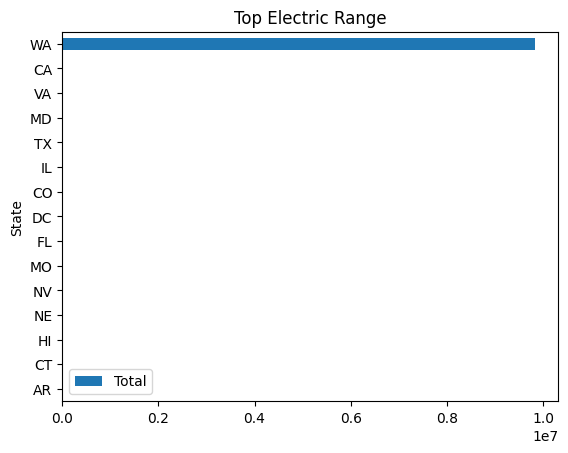

<Axes: title={'center': 'Top Electric Range'}, ylabel='State'>

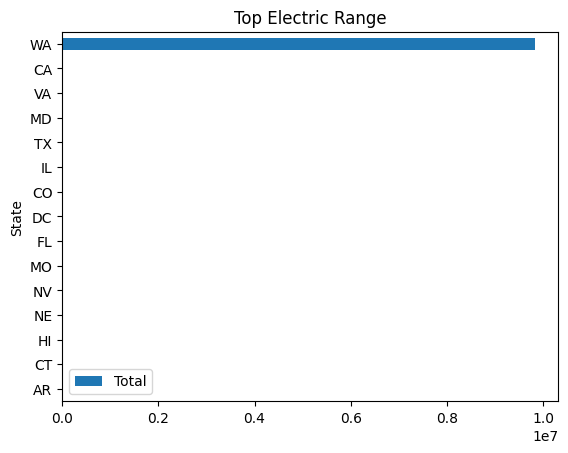

In [62]:
agg_df.set_index("State") \
    .sort_values("Total", ascending=False) \
    .head(15) \
    .sort_values("Total") \
    .plot(kind="barh", title="Top Electric Range")